# Project: Classify Medium Articles with Bag of Words

In [1]:
# for easy downloading of data
from huggingface_hub import hf_hub_download
import pandas as pd
from sklearn.model_selection import train_test_split
# to make bag of words representation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
  ConfusionMatrixDisplay)

c:\Users\TristramArmour\anaconda3\envs\nlp\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# download dataset of Medium articles from 
# https://huggingface.co/datasets/fabiochiu/medium-articles
df_articles = pd.read_csv(
  hf_hub_download("fabiochiu/medium-articles", repo_type="dataset",
                  filename="medium_articles.csv")
)

df_articles.head()

c:\Users\TristramArmour\anaconda3\envs\nlp\lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\TristramArmour\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


,title,text,url,authors,timestamp,tags
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci..."
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P..."
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We..."
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P..."
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology..."


In [5]:
df_articles.shape

(192368, 6)

## Data Preprocessing


In [6]:
df_articles["is_data_science"] = df_articles["tags"] \
  .apply(lambda tags_list: "Data Science" in tags_list)
df_articles["full_text"] = df_articles["title"] + " " + df_articles["text"]
df_articles.head()

,title,text,url,authors,timestamp,tags,is_data_science,full_text
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci...",False,Mental Note Vol. 24 Photo by Josh Riemer on Un...
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P...",False,Your Brain On Coronavirus Your Brain On Corona...
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We...",False,Mind Your Nose Mind Your Nose\n\nHow smell tra...
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P...",False,The 4 Purposes of Dreams Passionate about the ...
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology...",False,Surviving a Rod Through the Head You’ve heard ...


In [7]:
# sample 1000 articles is_data_science = True and 1000 articles with
# is_data_science = False
df = pd.concat([
    df_articles[df_articles["is_data_science"]].sample(n=1000),
    df_articles[~df_articles["is_data_science"]].sample(n=1000)
])

In [9]:
# train/test split
X = df[["full_text"]]
y = df["is_data_science"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

Model training

In [18]:
vectorizer = CountVectorizer(ngram_range=(1, 1))
full_texts_vectorized = vectorizer.fit_transform(X_train["full_text"])

In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(full_texts_vectorized, y_train)

LogisticRegression(max_iter=1000)

## Get metrics on Test Data

In [21]:
# vectorize test set and predict
full_texts_vectorized = vectorizer.transform(X_test["full_text"])
predictions = model.predict(full_texts_vectorized)

In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.83      0.90      0.86       200
        True       0.89      0.81      0.85       200

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



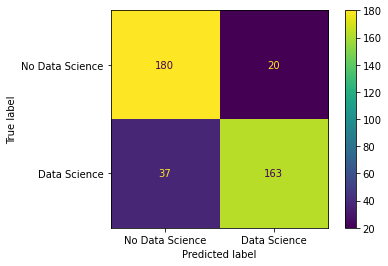

In [23]:
# plot confusion matrix
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["No Data Science", "Data Science"])
p = disp.plot()
fig = p.figure_
fig.set_facecolor('white')

Last, to get some insight on what the model has learned, let’s show the top 20 words with the highest weights from the LogisticRegression model, i.e. the words whose presence contributes the most to a True prediction of is_data_science.

In [24]:
# show top 20 ngrams by logistic regression weight
ngram_indices_sorted = sorted(list(vectorizer.vocabulary_.items()), key=lambda t: t[1])
ngram_sorted = list(zip(*ngram_indices_sorted))[0]
ngram_weight_pairs = list(zip(ngram_sorted, model.coef_[0]))
ngram_weight_pairs_sorted = sorted(ngram_weight_pairs, key=lambda t: t[1], reverse=True)
ngram_weight_pairs_sorted[:20]

[('data', 0.6904126416811578),
 ('science', 0.6462004731267758),
 ('grafiti', 0.5417694173340646),
 ('dataset', 0.4547468846782632),
 ('privacy', 0.4370703771175388),
 ('two', 0.4324649116518799),
 ('used', 0.430203443453238),
 ('most', 0.42505039982116727),
 ('scientists', 0.41064175636793826),
 ('values', 0.38768090452105325),
 ('average', 0.3866183056991588),
 ('article', 0.38268969554152477),
 ('computer', 0.36250965680432995),
 ('python', 0.35481793175873544),
 ('charts', 0.350219656997274),
 ('cloud', 0.3225466302129717),
 ('post', 0.3116429528075508),
 ('graphs', 0.30950907310453896),
 ('ny', 0.306827026151896),
 ('algorithms', 0.3062926263391344)]

In [28]:
ngram_weight_pairs_sorted[20:]

[('generative', 0.29781174076814654),
 ('days', 0.2964591109553936),
 ('field', 0.2939386151505876),
 ('up', 0.29380869299286216),
 ('visualization', 0.28894396857396487),
 ('zero', 0.28573655151889593),
 ('variables', 0.2792509156700417),
 ('signing', 0.2744347622437687),
 ('avocado', 0.2704653581542573),
 ('gender', 0.26509393922605873),
 ('jupyterhub', 0.26457610678701693),
 ('bi', 0.2637102077016176),
 ('analysis', 0.26175616245486666),
 ('practices', 0.26119760419669447),
 ('sequence', 0.2559236050591414),
 ('heroku', 0.24901007092053545),
 ('get', 0.24884502172009693),
 ('code', 0.24225211304631794),
 ('distribution', 0.2412331050670453),
 ('author', 0.24097417918680333),
 ('calculate', 0.2332309522405172),
 ('apriori演算法介紹', 0.23179372404752904),
 ('資料科學入門', 0.23179372404752904),
 ('購物車裡的秘密', 0.23179372404752904),
 ('關聯分析是什麼', 0.23179372404752904),
 ('educate', 0.22967460242551377),
 ('attention', 0.22925930657590296),
 ('target', 0.22814135338569846),
 ('articles', 0.22523169487